<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_13_%ED%99%94(popcorn_mi_lstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""4-1.popcorn(data).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Gvw8FRfr8KWL2_KrzwRF0U6RFoS3pP3T
"""

import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import PorterStemmer
import collections
import pickle

nltk.download('punkt')
nltk.download('stopwords')

# Commented out IPython magic to ensure Python compatibility.
# 학습 데이터를 읽어온다.
# %cd '/content/drive/My Drive/Colab Notebooks'

df = pd.read_csv('/content/drive/MyDrive/머신러닝/popcorn.tsv', header=0, sep='\t', quoting=3)
df['review'][0]
df['sentiment'][0]

# Pre-processing
stemmer = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

clean_text = []
for review in df['review']:
    # 1. 영문자와 숫자만 사용한다. 그 이외의 문자는 공백 문자로 대체한다.
    review = review.replace('<br />', ' ')       # <br> --> space
    review = review.replace('\'', '')            # dont't --> dont
    review = re.sub("[^a-zA-Z]", ' ', review)    # 영문자만 사용

    tmp = []
    for word in nltk.word_tokenize(review):
        # 2. 불용어 처리
        if len(word.lower()) > 1 and word.lower() not in stopwords:
            # 3. Stemming
            tmp.append(stemmer.stem(word.lower()))
    clean_text.append(' '.join(tmp))

clean_text[1]

# 어휘 사전을 생성한다.
vocab = collections.Counter()
for review in clean_text:
    for word in nltk.word_tokenize(review):
        vocab[word] += 1

# 빈도가 높은 순서로 max_vocab개로 어휘 사전을 생성한다.
max_vocab = 20000
word2idx = {w:(i+2) for i,(w,_) in enumerate(vocab.most_common(max_vocab))}
word2idx["<PAD>"] = 0   
word2idx["<OOV>"] = 1

# review 문장을 word2idx의 인덱스로 표시한다.
x_idx = []
for review in clean_text:
    tmp = []
    for word in nltk.word_tokenize(review):
        if word in word2idx:
            tmp.append(word2idx[word])
        # else:
        #     tmp.append(word2idx['<OOV>'])
    x_idx.append(tmp)

# 학습 데이터를 저장해 둔다.
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'wb') as f:
    pickle.dump([clean_text, x_idx, list(df['sentiment']), word2idx], f, pickle.DEFAULT_PROTOCOL)

print(x_idx[0])

clean_text[0]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[477, 25, 177, 6919, 128, 90, 901, 88, 12, 808, 518, 12, 12922, 12, 7872, 211, 50, 10, 744, 1522, 82, 102, 16, 570, 3003, 211, 8, 210, 668, 2201, 912, 7872, 64, 3571, 64, 294, 3, 262, 25, 11, 366, 93, 288, 1199, 591, 6919, 63, 623, 2121, 27, 521, 591, 736, 24, 527, 395, 198, 418, 1448, 839, 1406, 5, 6919, 460, 25, 437, 62, 194, 126, 175, 6919, 7729, 8405, 8, 2, 6919, 129, 15, 39, 35, 129, 213, 16, 217, 69, 294, 3, 130, 144, 90, 105, 7298, 2932, 1014, 353, 826, 7730, 560, 3605, 281, 736, 1351, 50, 6919, 301, 24, 661, 6919, 15880, 675, 10066, 826, 7730, 9, 3807, 50, 23, 38, 3061, 736, 465, 8597, 211, 437, 6919, 88, 72, 570, 36, 5, 6919, 98, 386, 1354, 152, 1594, 1182, 353, 27, 66, 140, 4127, 3192, 342, 3, 4833, 24, 353, 283, 66, 437, 41, 4, 145, 173, 522, 152, 6

'stuff go moment mj ive start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad mkay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# -*- coding: utf-8 -*-
"""4-4.popcorn(data_MI).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1rFDgBMzo_8H4DwUpO-Lf5niHS6cSxfQi
"""

import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import collections
import pickle

# Commented out IPython magic to ensure Python compatibility.
# %cd '/content/drive/My Drive/Colab Notebooks'

# 1차 전처리가 완료된 clean_text와 sentiment 데이터를 읽어온다.
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'rb') as f:
    x_data, _, y_data, _ = pickle.load(f)

# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# 1차 vocabulary를 생성하고, 리뷰 데이터를 인덱스로 표현한다.
vocab = collections.Counter()
for review in x_train:
    for word in review.split(' '):
        vocab[word] += 1

# 빈도가 높은 순서로 vocabulary를 생성한다. 사용 빈도가 5 이하인 단어는 제외한다.
word2idx = {}
for i, (word, count) in enumerate(vocab.most_common()):
    if count < 5:
        break
    word2idx[word] = i + 2

word2idx["<PAD>"] = 0   
word2idx["<OOV>"] = 1
idx2word = {v:k for k, v in word2idx.items()}

# review 문장을 word2idx의 인덱스로 표시한다.
train_idx = []
for review in x_train:
    tmp = []
    for word in review.split(' '):
        if word in word2idx:
            tmp.append(word2idx[word])
        # else:
        #     tmp.append(word2idx['<OOV>'])
    train_idx.append(tmp)

# [단어-label] 리스트를 만든다.
word_label = []
for review, label in zip(train_idx, y_train):
    for w in review:
        word_label.append([w, label])
        
word_label = np.array(word_label)

# 단어마다 Mutual Information (MI)을 계산한다.
#
# word_label : 단어 인덱스 - label 목록 배열
#              [[ 2, 0],
#               [85, 0], ...]
#
# mi = p(x|y=0) * p(y=0) * log(p(x|y=0) / p(x)) +
#      p(x|y=1) * p(y=1) * log(p(x|y=1) / p(x))
# -----------------------------------------------

# y = 0인 단어목록 (x[0])과 y = 1인 단어목록 (x[1])을 만든다.
x = np.array([np.where(word_label[:, 1] == i)[0] for i in [0, 1]])
py = np.array([(word_label[:, 1] == i).mean() for i in [0, 1]])
N = len(idx2word)

mi_word = []
for i in range(2, N):
    px = (word_label[:, 0] == i).mean()
    
    mi = 0
    for y in [0, 1]:
        # p(x | y)
        pxy = (word_label[x[y], 0] == i).mean()
        mi += (pxy * py[y]) * np.log(1e-8 + pxy / px)
        
    mi_word.append([mi, i])
    
    if i % 100 == 0:
        print(i, '/', N)

# mi_word 리스트를 내림차순으로 정렬한다.
mi_word.sort(reverse = True)

# MI 상위 20개 단어를 확인해 본다.
print([idx2word[y] for x, y in mi_word[:20]])

# 상위 max_vocab개의 단어로 vocabulrary를 생성한다.
max_vocab = 6000
word2idx2 = {idx2word[y]:(i+2) for i, [x, y] in enumerate(mi_word[:max_vocab])}
word2idx2['<PAD>'] = 0
word2idx2['<OOV>'] = 1
idx2word2 = {v:k for k, v in word2idx2.items()}

# MI 기반 vocabulary를 이용하여 리뷰 데이터를 다시 만든다. OOV는 제거한다.
def build_data(data):
    d_idx = []
    for sent in data:
        tmp = []
        for word in sent.split():
            if word in word2idx2:
                tmp.append(word2idx2[word])
            # else:
            #     tmp.append(word2idx2['<OOV>'])
        d_idx.append(tmp)
    return d_idx

x_train_mi = build_data(x_train)
x_test_mi = build_data(x_test)

# 학습 데이터를 저장해 둔다.
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'wb') as f:
    pickle.dump([x_train_mi, y_train, x_test_mi, y_test, word2idx2], f, pickle.DEFAULT_PROTOCOL)

x_test_mi[0]


평균 = 79.0452
최소 = 5
최대 = 625
중앙값 = 60.0


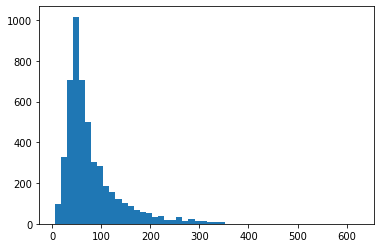

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 120, 32)           192096    
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 274,657
Trainable params: 274,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
40/40 [==============================] - 3s 31ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/30
40/40 [==

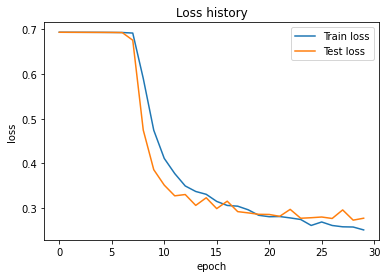


Accuracy = 88.42 %
ROC AUC score = 0.95


In [ ]:
# -*- coding: utf-8 -*-
"""4-5.popcorn(LSTM_MI).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1_wJaHRo3OAupl5LwfFbHdCVaad0rDnAA
"""

# Word Embedding & LSTM을 이용한 감성분석
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pickle

# Commented out IPython magic to ensure Python compatibility.
# %cd '/content/drive/My Drive/Colab Notebooks'

# 학습, 시험 데이터를 읽어온다.
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test, word2idx = pickle.load(f)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# 각 리뷰의 길이를 측정하고, 평균 길이를 구한다.
x_len = [len(x) for x in x_test]

print('평균 =', np.mean(x_len))
print('최소 =', np.min(x_len))
print('최대 =', np.max(x_len))
print('중앙값 =', np.median(x_len))

# 길이 분포를 확인한다.
plt.hist(x_len, bins=50)
plt.show()

# 각 리뷰의 길이를 max_seq_len로 맞춘다. 길면 자르고, 짧으면 padding을 추가한다.
MAX_SEQ_LEN = 120
x_train = pad_sequences(x_train, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

# Embedding & LSTM 모델을 생성한다.
vocab_size = len(word2idx) + 1
EMBEDDING_DIM = 32
HIDDEN_DIM = 128

x_input = Input(batch_shape=(None, x_train.shape[1]))
e_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM)(x_input)
e_layer = Dropout(rate=0.5)(e_layer)
r_layer = LSTM(HIDDEN_DIM, dropout=0.5)(e_layer)
y_output = Dense(1, activation='sigmoid')(r_layer)

model = Model(x_input, y_output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001))
model.summary()

# 학습
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 512, epochs = 30)

# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 시험 데이터로 학습 성능을 평가한다
pred = model.predict(x_test)
y_pred = np.where(pred > 0.5, 1, 0)
accuracy = (y_pred == y_test).mean()
print("\nAccuracy = %.2f %s" % (accuracy * 100, '%'))
print("ROC AUC score = %.2f" % (roc_auc_score(y_test, pred)))
